In [1]:
!pip install snap-stanford

In [1]:
import pandas as pd
import numpy as np

G1: Nodes 7707, Edges 9387
Number of Nodes: 7707
Number of nodes of zero degree: 0
Average degree: 2.4359673024523163
Size of largest strongly connected component: 7707
Number of connected components: 1
Number of communities: 37
Largest community: 1801
Smallest community: 4
Community 4: [1487, 4706, 3779, 3674, 4423, 4515, 4117, 756, 1243, 1841, 4452, 4403, 2775, 4170, 1517, 573, 2474, 2166, 1428, 676, 322, 456, 2120, 755, 1756, 2799, 2580, 194, 5089, 7542, 5865, 6578, 7284, 7309, 3508, 7129, 6837, 6958, 6656, 6708, 7298, 3248, 7424, 954, 1668, 1565, 1204, 354, 1108, 1338, 1627, 2853, 1461, 1115, 1105, 5331, 5779, 6300, 7118, 6679, 6319, 1613, 1451, 1097, 454, 5860, 6328, 7156, 6184, 5143, 3150, 2806, 7041, 7159, 2498, 4791, 7497, 6992, 5096, 3685, 4067, 2683, 2001, 3198, 2242, 1366, 4211, 484, 2351, 3613, 1226, 3489, 1241, 2634, 3851, 3729, 1511, 574, 2107, 1631, 1120, 1215, 3255, 3294, 307, 1475, 2520, 2676, 802, 3013, 2037, 362, 2886, 1195, 1006, 4447, 5114, 7251, 6334, 6395, 2411, 

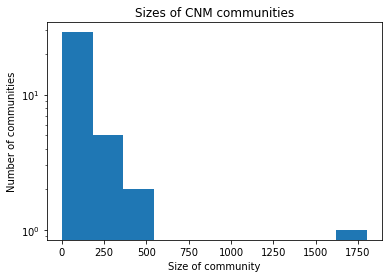

The modularity of the network is 0.804975


<Figure size 432x288 with 0 Axes>

In [3]:
## 강원도 파일로 돌린거

import snap
import matplotlib.pyplot as plt

# 그래프 만들기
G1 = snap.LoadEdgeList(snap.PUNGraph, "gw_start_end.txt", 0, 1) # PUNGraph -> 다른걸로 조정가능한듯?

print("G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges()))
print("Number of Nodes: %d" % G1.GetNodes())

# 1.6 number of nodes of zero degree
print("Number of nodes of zero degree: %d" % snap.CntDegNodes(G1, 0))

# Get in degree distribution(분포정도)

DegToCntV = snap.TIntPrV() # DegToCntV: A vector of (degree, number of nodes of such degree) pairs.
snap.GetDegCnt(G1, DegToCntV) # GetDegCnt(Graph, DegToCntV)
degree = []
numNodes = []
sumDegrees = 0
for item in DegToCntV:
    degree.append(item.GetVal1())
    numNodes.append(item.GetVal2())
    sumDegrees += item.GetVal1()*item.GetVal2()
    #print("%d nodes with in-degree %d" % (item.GetVal2(), item.GetVal1()))

plt.plot(degree, numNodes)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('frequency')
plt.xlabel('degree')
plt.title('Degree distribution')
plt.savefig('degreeDist.png')
plt.clf()

# Get average degree
print("Average degree:", sumDegrees/float(sum(numNodes)))

# Get largest strongly connected component
MxScc = snap.GetMxScc(G1)
print("Size of largest strongly connected component:", MxScc.GetNodes())

# Get strongly connected components
Components = snap.TCnComV()
snap.GetWccs(G1, Components)
wcc_sizes = []
for CnCom in Components:
    wcc_sizes.append(CnCom.Len())

print("Number of connected components:", len(wcc_sizes))

# Clauset-Newman-Moore community detection
CmtyV = snap.TCnComV() # 각 구성 요소는 노드 ID의 TIntV 벡터로 구성됩니다.
modularity = snap.CommunityCNM(G1, CmtyV)# CommunityCNM(input, output)

count = 0
sizes = []
communities = []
for Cmty in CmtyV:
    listcmty = []
    for NI in Cmty:
        listcmty.append(NI)

    communities.append(listcmty)
    count += 1
    sizes.append(len(listcmty))
print("Number of communities:", count)
print("Largest community:", max(sizes))
print("Smallest community:", min(sizes))
print("Community 4:", communities[4])
coummunity_11 = communities[11]
print("Community 11:", coummunity_11)
print("Community 21:", communities[21])
print("Community 36:", communities[36])

# plot histogram of community sizes
sizes.sort()
plt.hist(sizes, log=True)
plt.xlabel("Size of community")
plt.ylabel("Number of communities")
plt.title("Sizes of CNM communities")
plt.show()
plt.savefig("cnm-sizes.png")
#print("Size of communities:", sizes)
print("The modularity of the network is %f" % modularity)